# Iterasi 1
(Libray Encoding)

## Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "StudentPerformanceFactors.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "lainguyn123/student-performance-factors",
  file_path,
)

print("First 5 records:", df.head())

/tmp/ipython-input-3915407261.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \

## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


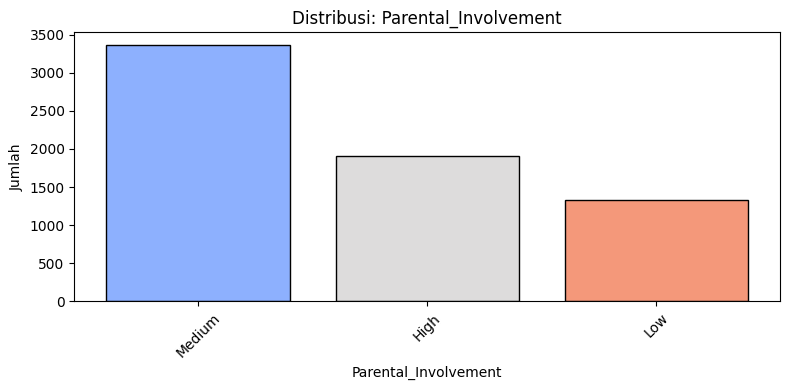

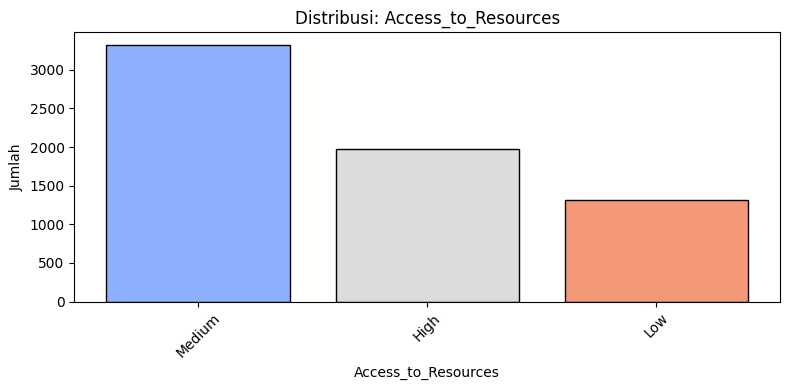

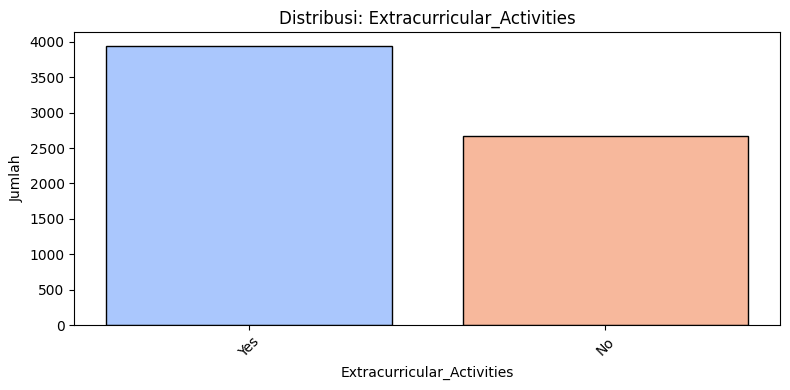

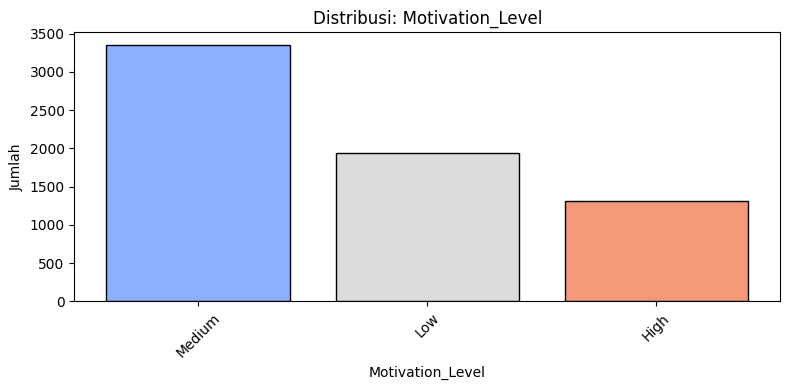

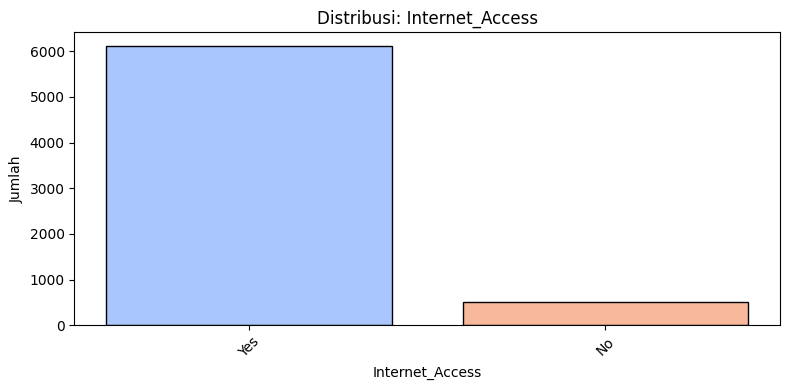

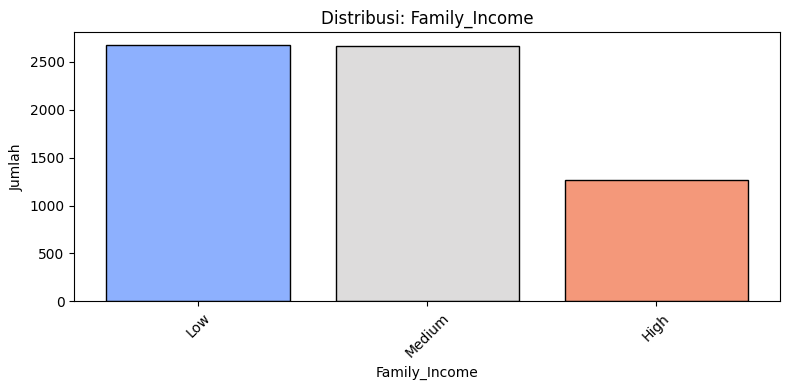

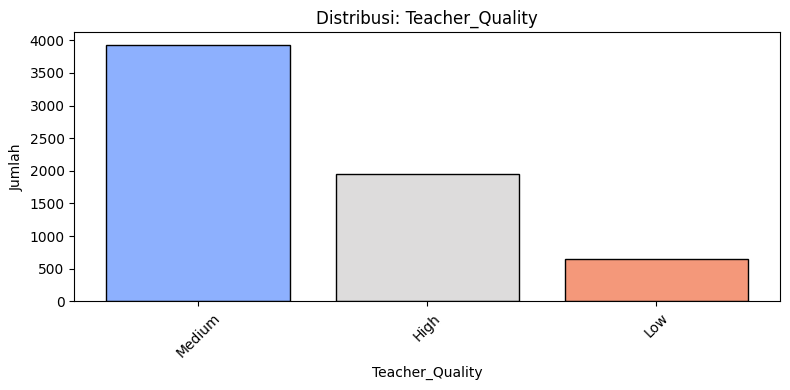

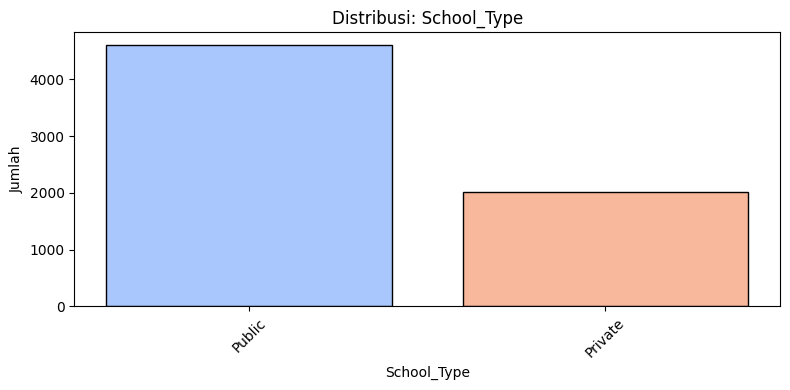

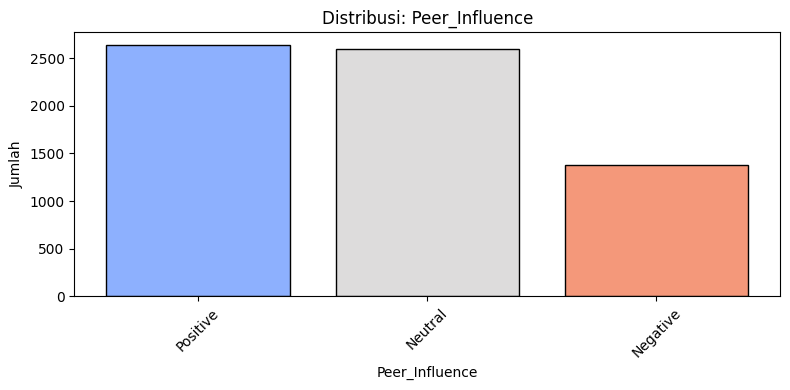

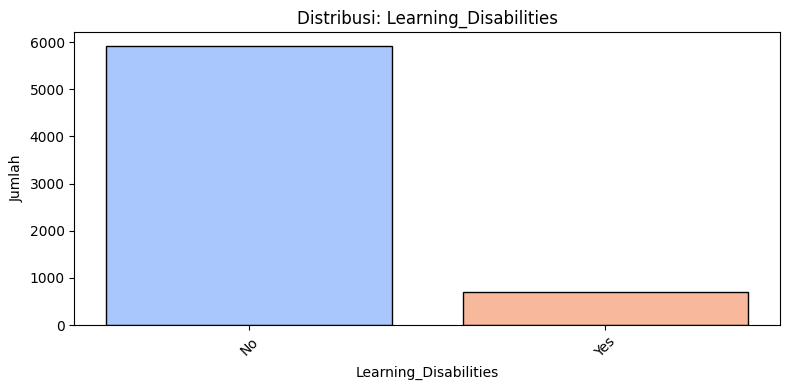

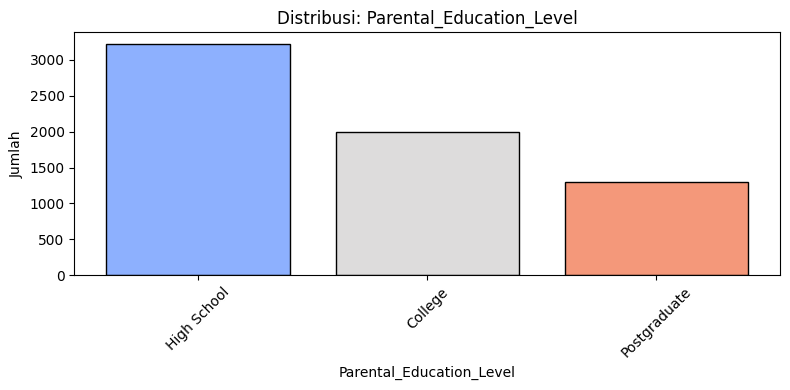

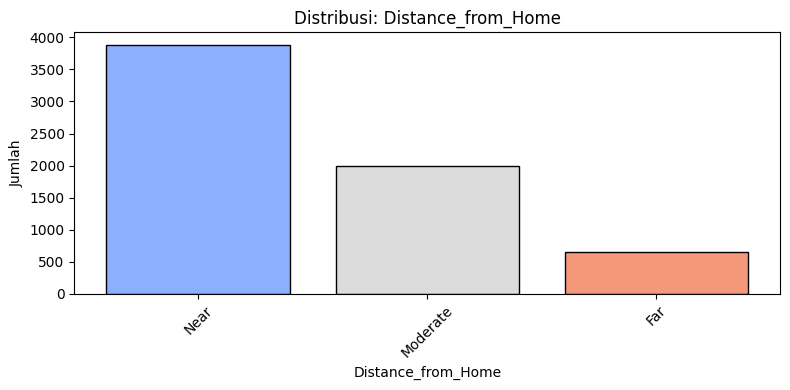

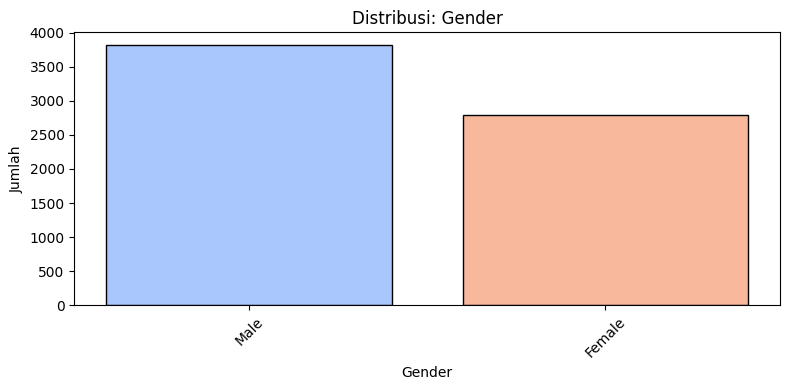

In [ ]:
# Deteksi otomatis kolom kategorikal (tipe data object atau category)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Loop untuk setiap kolom kategorikal
for col in categorical_columns:
    value_counts = df[col].value_counts()
    categories = value_counts.index
    counts = value_counts.values

    colors = sns.color_palette('coolwarm', n_colors=len(categories))

    plt.figure(figsize=(8, 4))
    bars = plt.bar(categories, counts, color=colors, edgecolor='black')
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

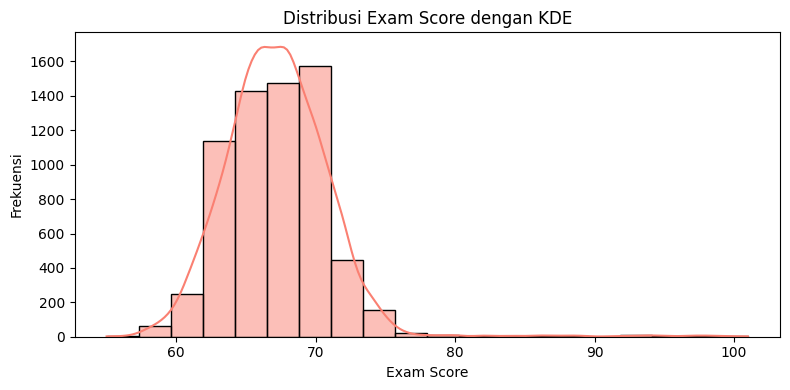

In [ ]:
# Visualitation of Exam_Score
plt.figure(figsize=(8, 4))
sns.histplot(df['Exam_Score'], bins=20, kde=True, color='salmon', edgecolor='black')
plt.title('Distribusi Exam Score dengan KDE')
plt.xlabel('Exam Score')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

## Split Data

In [ ]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: ", {len(X_train)})
print(f"Test: ", {len(X_test)})

Train:  {5285}
Test:  {1322}


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5285, 19), (5285,), (1322, 19), (1322,))

## Outliers

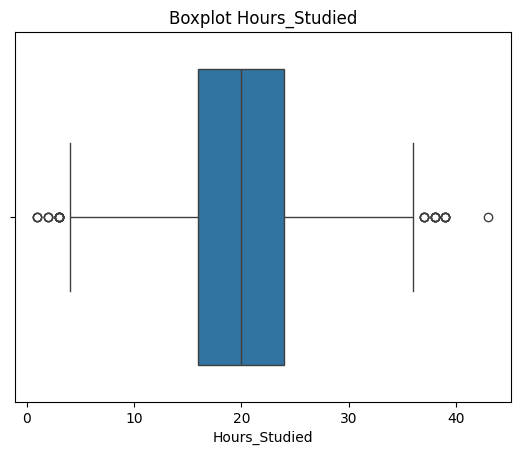

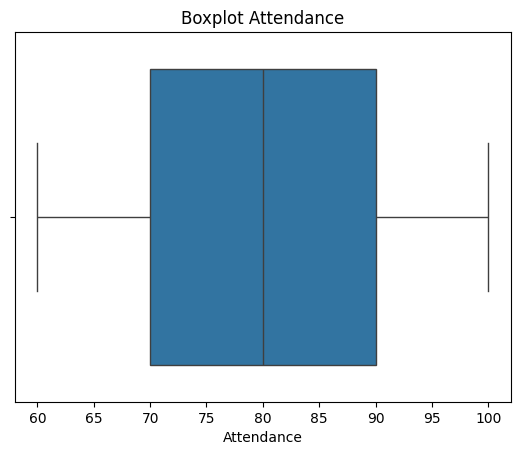

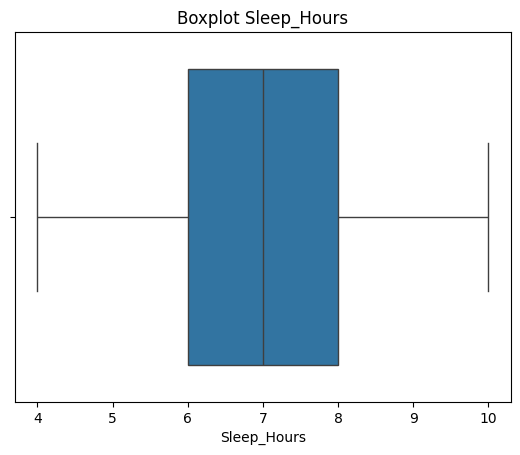

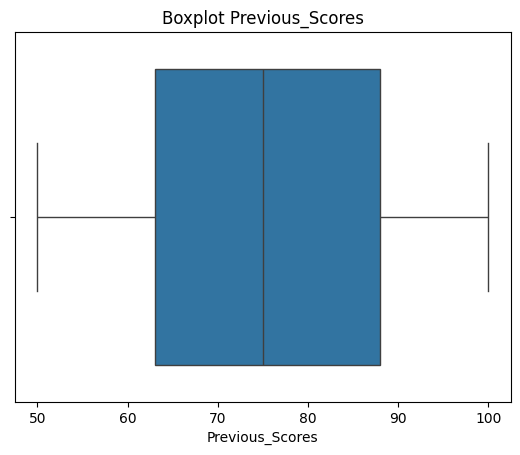

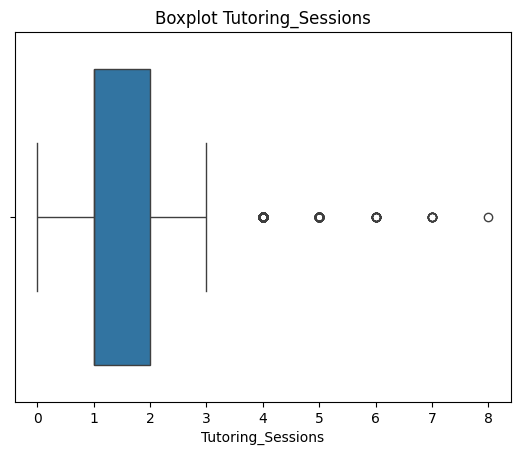

Text(0.5, 1.0, 'Boxplot Exam_Score')

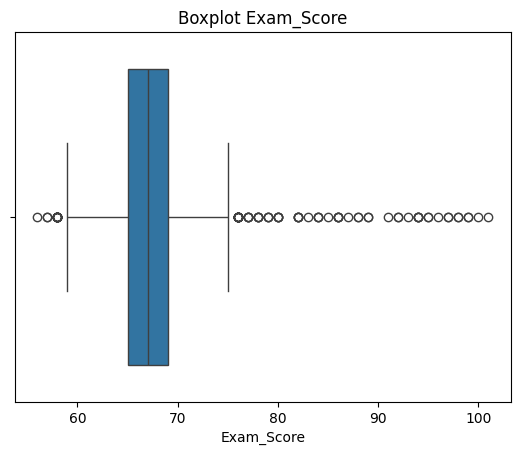

In [ ]:
# Deteksi Outliers dari tiap kolom nummerik
# Hours_Studied
sns.boxplot(x=X_train['Hours_Studied']) # Deteksi
plt.title("Boxplot Hours_Studied")
plt.show()

# Attendance
sns.boxplot(x=X_train['Attendance']) # Deteksi
plt.title("Boxplot Attendance")
plt.show()

# Sleep_Hours
sns.boxplot(x=X_train['Sleep_Hours']) # Deteksi
plt.title("Boxplot Sleep_Hours")
plt.show()

# Previous_Scores
sns.boxplot(x=X_train['Previous_Scores']) # Deteksi
plt.title("Boxplot Previous_Scores")
plt.show()

# Tutoring_Sessions
sns.boxplot(x=X_train['Tutoring_Sessions']) # Deteksi
plt.title("Boxplot Tutoring_Sessions")
plt.show()

# Exam_Score
sns.boxplot(x=y_train) # Deteksi
plt.title("Boxplot Exam_Score")

In [ ]:
train_combined = X_train.copy()
train_combined['Exam_Score'] = y_train

def detect_outliers_iqr_batch(df, columns):
    results = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        count = len(outliers)
        percent = (count / len(df)) * 100

        results[col] = {
            "count": count,
            "percent": percent,
            "outliers": outliers
        }
    return results


columns_to_check = ['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']
outlier_results = detect_outliers_iqr_batch(train_combined, columns_to_check)

# Tampilkan hasil
for col, res in outlier_results.items():
    print(f"Outlier {col}: {res['count']} data ({res['percent']:.2f}%)")

Outlier Hours_Studied: 31 data (0.59%)
Outlier Tutoring_Sessions: 349 data (6.60%)
Outlier Exam_Score: 89 data (1.68%)


## Preprocessing Data

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

### Penanganan Outlier

In [ ]:
print(y_train.unique())

[ 69  66  72  71  64  70  74  63  67  68  61  65  73  62  60  76  75  59
  82  58  89  92  79  78  77  91  98  85  57  84  83  80  94  95  99  86
 101  97  88  56 100  87  93  96]


In [ ]:
y_train = y_train.replace(101, 100)

Imputasi Mean

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.means_ = {}

    def fit(self, X, y=None):
        if self.columns is None:
            self.columns = X.columns.tolist()
        for col in self.columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            mask = (X[col] >= lower) & (X[col] <= upper)
            self.means_[col] = X.loc[mask, col].mean()
        return self

    def transform(self, X):
        X = X.copy()
        X[self.columns] = X[self.columns].astype(float)
        for col in self.columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            outlier_mask = (X[col] < lower) | (X[col] > upper)
            X.loc[outlier_mask, col] = self.means_[col]
        return X

### Encoding

In [ ]:
encoding = {
    'Parental_Involvement': {'Low': 0 , 'Medium': 1, 'High': 2},
    'Access_to_Resources': {'Low': 0 , 'Medium': 1, 'High': 2},
    'Extracurricular_Activities': {'Yes': 1, 'No': 0},
    'Motivation_Level': {'Low': 0 , 'Medium': 1, 'High': 2},
    'Internet_Access': {'Yes': 1, 'No': 0},
    'Family_Income': {'Low': 0 , 'Medium': 1, 'High': 2},
    'Teacher_Quality': {'Low': 0 , 'Medium': 1, 'High': 2},
    'School_Type': {'Public': 1, 'Private': 0},
    'Peer_Influence': {'Negative': 0 , 'Neutral': 1, 'Positive': 2},
    'Learning_Disabilities': {'Yes': 1, 'No': 0},
    'Parental_Education_Level': {'High School': 0 , 'College': 1, 'Postgraduate': 2},
    'Distance_from_Home': {'Far': 0 , 'Moderate': 1, 'Near': 2},
    'Gender': {'Male': 1, 'Female': 0},

}


def encode_with_mapping(X):
    for col, mapping in encoding.items():
        X[col] = X[col].map(mapping)
    return X

### Pipeline

In [ ]:
num_pipe = Pipeline([
    ('outlier', OutlierImputer()),
    ('scaler', MinMaxScaler())
])

In [ ]:
from sklearn.preprocessing import FunctionTransformer

cat_pipe = Pipeline([
    ('encoder', FunctionTransformer(encode_with_mapping, validate=False)),
    ('impute', KNNImputer(n_neighbors=5))
])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

preprocessor = ColumnTransformer([
    ('num', num_pipe, selector(dtype_include='number')),
    ('cat', cat_pipe, selector(dtype_include='object'))
])

In [ ]:
# Fit dan Transform data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=df.columns.drop('Exam_Score'))
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=df.columns.drop('Exam_Score'))

### Feature Selection

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.api import add_constant

# train_combined = X_train.copy()
# train_combined['Exam_Score'] = y_train

# correlation_matrix = train_combined.corr()

# plt.figure(figsize=(20, 16))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title("Korelasi Antar Tabel")
# plt.show()

# # VIF
# X = add_constant(df)
# vif_data = pd.DataFrame()
# vif_data["Feature"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# vif_data.sort_values(by="VIF", ascending=False)

In [ ]:
# top_correlations = correlation_matrix["Exam_Score"].abs().sort_values(ascending=False).head(10)
# print(top_correlations)

## Train Model

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    'LinearRegression': Pipeline([
        ('preprocessing', preprocessor),
        ('model', LinearRegression())
    ]),
    'RandomForest': Pipeline([
        ('preprocessing', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('preprocessing', preprocessor),
        ('model', XGBRegressor(random_state=42))
    ])
}

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = []

for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)


    print(f"\n=== {name} ===")
    print(f"Train:")
    print(f"  MSE : {mse_train:.4f}")
    print(f"  MAE : {mae_train:.4f}")
    print(f"  R²  : {r2_train:.4f}")
    print(f"Test:")
    print(f"  MSE : {mse_test:.4f}")
    print(f"  MAE : {mae_test:.4f}")
    print(f"  R²  : {r2_test:.4f}")


=== LinearRegression ===
Train:
  MSE : 4.7416
  MAE : 0.6985
  R²  : 0.6915
Test:
  MSE : 3.7078
  MAE : 0.6356
  R²  : 0.7377

=== RandomForest ===
Train:
  MSE : 0.8068
  MAE : 0.4484
  R²  : 0.9475
Test:
  MSE : 5.0136
  MAE : 1.1421
  R²  : 0.6453

=== XGBoost ===
Train:
  MSE : 0.3800
  MAE : 0.3761
  R²  : 0.9753
Test:
  MSE : 5.4191
  MAE : 1.1255
  R²  : 0.6166


In [ ]:
X_train.sample()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
316,0.375,0.875,0.166667,0.3,0.0,0.5,0.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0


## Evaluation Model

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

for model_name, model in models.items():
    model.fit(X_train,y_train)

for model_name, model in models.items():
    print(f"Model: {model_name}")
    predictions = model.predict(X_test)
    print(f"Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
    print(f"Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
    print(f"R² Score:", r2_score(y_test, predictions))
    print("=" * 50)


Best Model Selection

In [ ]:
best_model = models['LinearRegression']

# Prediksi training
y_train_pred = best_model.predict(X_train)
train_MSE = mean_squared_error(y_train, y_train_pred)
train_MAE = mean_absolute_error(y_train, y_train_pred)
train_R2  = r2_score(y_train, y_train_pred)

# Prediksi testing
y_test_pred = best_model.predict(X_test)
test_MSE = mean_squared_error(y_test, y_test_pred)
test_MAE = mean_absolute_error(y_test, y_test_pred)
test_R2  = r2_score(y_test,y_test_pred)

# Metriks
print("Mean Squared Error")
print(f"MSE Training: {train_MSE:.4f}")
print(f"MSE Testing: {test_MSE:.4f}")
print("---")
print("Mean Absulote Error")
print(f"MAE Training: {train_MAE:.4f}")
print(f"MAE Testing: {test_MAE:.4f}")
print("---")
print("R2")
print(f"R2 Training: {train_R2:.4f}")
print(f"R2 Testing: {test_R2:.4f}")

In [ ]:
for name, model in models.items():
    print(f"Model: {name}")

    # Training model
    model.fit(X_train, y_train)

    # Prediksi training dan testing
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluasi
    train_MSE = mean_squared_error(y_train, y_train_pred)
    train_MAE = mean_absolute_error(y_train, y_train_pred)
    train_R2  = r2_score(y_train, y_train_pred)

    test_MSE = mean_squared_error(y_test, y_test_pred)
    test_MAE = mean_absolute_error(y_test, y_test_pred)
    test_R2  = r2_score(y_test, y_test_pred)

    # Cetak metrik
    print("  Mean Squared Error")
    print(f"    MSE Training: {train_MSE:.4f}")
    print(f"    MSE Testing : {test_MSE:.4f}")
    print("  Mean Absolute Error")
    print(f"    MAE Training: {train_MAE:.4f}")
    print(f"    MAE Testing : {test_MAE:.4f}")
    print("  R2 Score")
    print(f"    R2 Training : {train_R2:.4f}")
    print(f"    R2 Testing  : {test_R2:.4f}")
    print("-" * 40)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    results.append({
        "Model": name,
        "MSE Train": mse_train,
        "MSE Test": mse_test,
        "Δ MSE": mse_test - mse_train,
        "MAE Train": mae_train,
        "MAE Test": mae_test,
        "Δ MAE": mae_test - mae_train,
        "R2 Train": r2_train,
        "R2 Test": r2_test,
        "Δ R2": r2_train - r2_test
    })

import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)


In [ ]:
plt.figure(figsize=(10, 6))
df_results.set_index("Model")[["R2 Train", "R2 Test"]].plot.bar(rot=0, width=0.4)
plt.title("Perbandingan R2 Score antara Training dan Testing")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df_results.to_csv('model_evaluation_results.csv', index=False)

In [ ]:
best_model.fit(X_train, y_train)
best_model.score(X_test, y_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = best_model.predict(X_test)

# Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', linewidth=2)  # Garis y = x

plt.title("Linear Regression: Actual vs Predicted Exam Scores")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.grid(True)
plt.tight_layout()
plt.show()


Predict

In [ ]:
# prediksi data baru
sample_data = pd.DataFrame({
    'Hours_Studied': [27],
    'Attendance': [92],
    'Parental_Involvement': [0],
    'Access_to_Resources': [2],
    'Extracurricular_Activities': [1],
    'Sleep_Hours': [6],
    'Previous_Scores': [90],
    'Motivation_Level': [2],
    'Internet_Access': [1],
    'Tutoring_Sessions': [4],
    'Family_Income': [1],
    'Teacher_Quality': [2],
    'School_Type': [1],
    'Peer_Influence': [2],
    'Physical_Activity': [2],
    'Learning_Disabilities': [0],
    'Parental_Education_Level': [1],
    'Distance_from_Home': [2],
    'Gender': [1]
})
feature_target = joblib.load("feature_Exam-Score.pkl")
sample_data = sample_data[feature_target]

# Prediksi skor ujian
prediction = best_model.predict(sample_data)

print(f"\nPredicted Exam Score: {prediction[0]:.2f}")

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, scoring='r2', cv=5)
print(f"R² cross-validation mean: {scores.mean():.4f}, std: {scores.std():.4f}")


In [ ]:
from joblib import dump

dump(model, 'regression_Exam.pkl')

In [ ]:
X.to_csv('Fitur.csv', index=False)

In [ ]:
!pip freeze > requirements.txt